### Compositional analysis of DMD Vascular states snRNA-Seq dataset using `ScCoda`
- **Developed by**: Srivalli Kolla
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 19_06_2024
- **Last modified**: 19_06_2024

# Import statements and environments

In [49]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

### Set up working environment

In [50]:
sc.settings.verbosity = 3
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

# Data preparation

## Data loading

In [51]:
adata = sc.read_h5ad("../../data/heart_mm_nuclei-23-0092_scANVI-vascular_states_ctl240131.raw.h5ad")
adata

AnnData object with n_obs × n_vars = 22451 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Data cleanup

In [52]:
adata.obs['cell_types'] = adata.obs['C_scANVI'].copy()
del adata.obs['cell_type'] 
adata.obs

,cell_source,donor,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,cell_states,...,pct_counts_ribo,percent_mt2,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,C_scANVI,cell_types
CTCCAACCACAAGTTC-1-A9_2,HIRI-Nuclei,A9_2,23001.770688,4489,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.868855,0.016337,0.051983,0.0,-0.355854,-0.387663,0,10,SMC2_art,SMC2_art
AGGTTGTCAGCACGAA-1-A9_2,HIRI-Nuclei,A9_2,22649.318476,4408,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.455739,0.021165,0.046346,0.0,-0.264880,-0.409038,0,10,SMC2_art,SMC2_art
AGGCCACCAGAAGCTG-1-A9_2,HIRI-Nuclei,A9_2,23859.994911,4665,NaN,NaN,NaN,A9_2,NaN,NaN,...,2.157448,0.057685,0.045903,3.0,0.299016,-0.284226,0,10,SMC2_art,SMC2_art
AGTCTCCCACGATAGG-1-A9_2,HIRI-Nuclei,A9_2,22967.895660,4438,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.775318,0.022540,0.103909,0.0,-0.133833,-0.517638,0,10,SMC2_art,SMC2_art
GGACGTCCAATCCAGT-1-A9_2,HIRI-Nuclei,A9_2,23623.276279,4604,NaN,NaN,NaN,A9_2,NaN,NaN,...,2.556115,0.078601,0.031951,0.0,-0.502134,-0.341586,0,5,EC7_atria,EC7_atria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGCGCGTATCGTGT-1-B2_2,HIRI-Nuclei,B2_2,4564.124814,616,NaN,NaN,NaN,B2_2,NaN,NaN,...,2.427638,0.183940,0.000000,0.0,-0.085459,-0.006219,5,11,EC6_ven,EC6_ven
TTGAACGGTACGAGCA-1-B2_2,HIRI-Nuclei,B2_2,4625.465847,624,NaN,NaN,NaN,B2_2,NaN,NaN,...,2.117421,0.157844,0.000000,0.0,-0.100486,0.039141,5,11,EC1_cap,EC1_cap
AGCGTCGGTTATGTGC-1-B2_2,HIRI-Nuclei,B2_2,4887.690665,669,NaN,NaN,NaN,B2_2,NaN,NaN,...,2.077151,0.067260,0.000000,0.0,-0.120234,0.153744,5,11,EC6_ven,EC6_ven
TCGTAGACAAGACGGT-1-B2_2,HIRI-Nuclei,B2_2,4500.551450,602,NaN,NaN,NaN,B2_2,NaN,NaN,...,5.109489,0.137643,0.104275,0.0,-0.050858,0.121803,5,11,PC3_str,PC3_str


# ScCODA - All

In [53]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(adata, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_data

MuData object with n_obs × n_vars = 22457 × 32295
  2 modalities
    rna:	22451 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	6 x 10
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

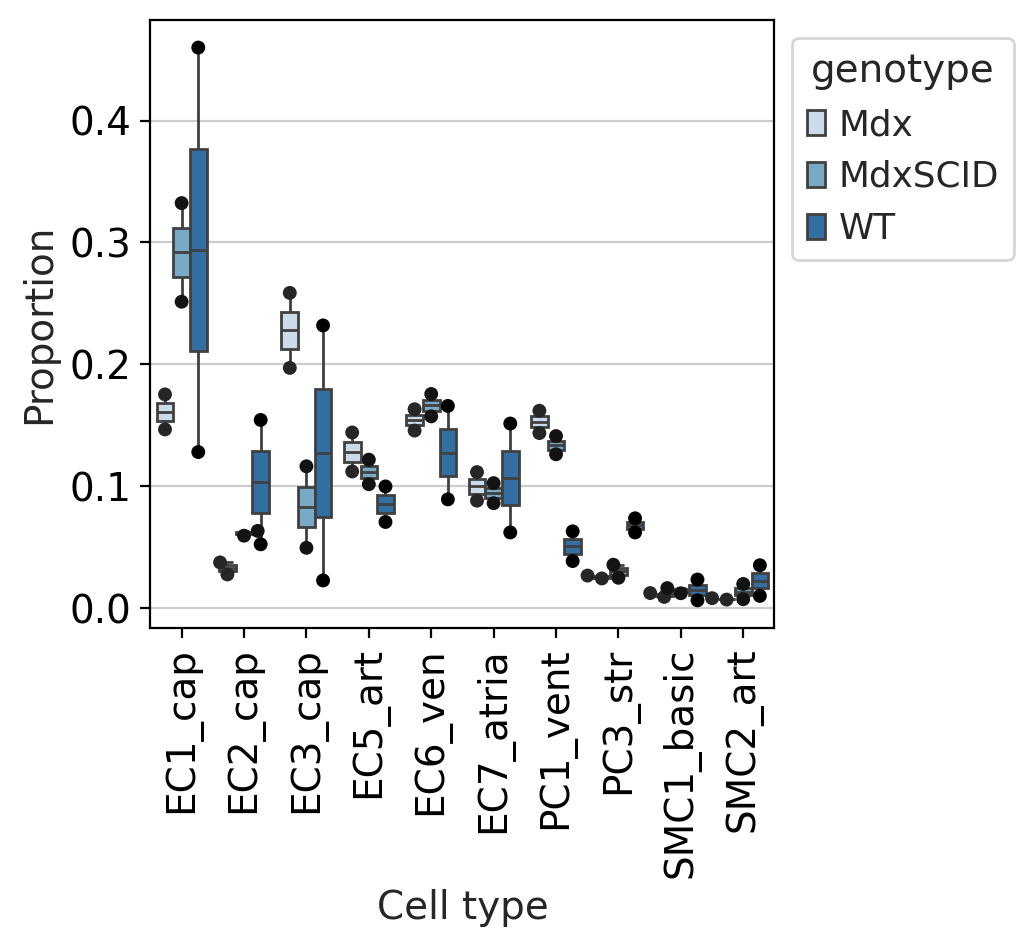

In [54]:
pt.pl.coda.boxplots(sccoda_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

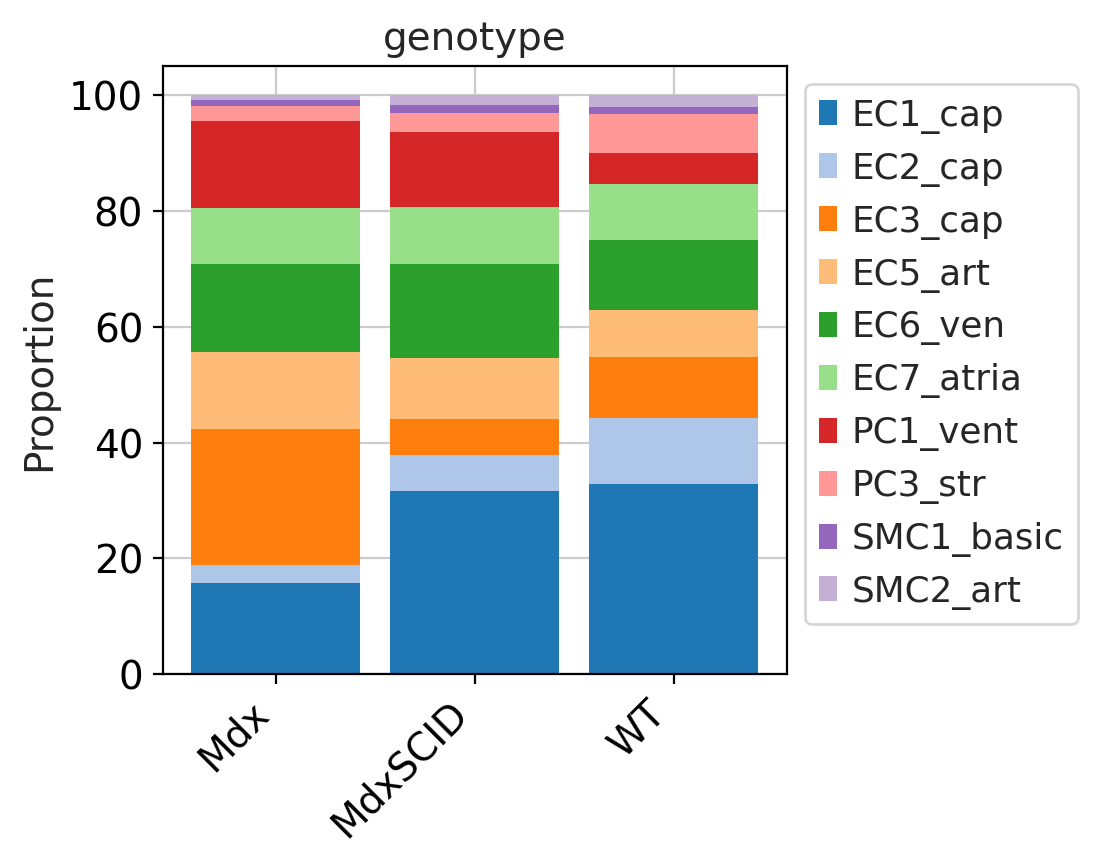

In [55]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

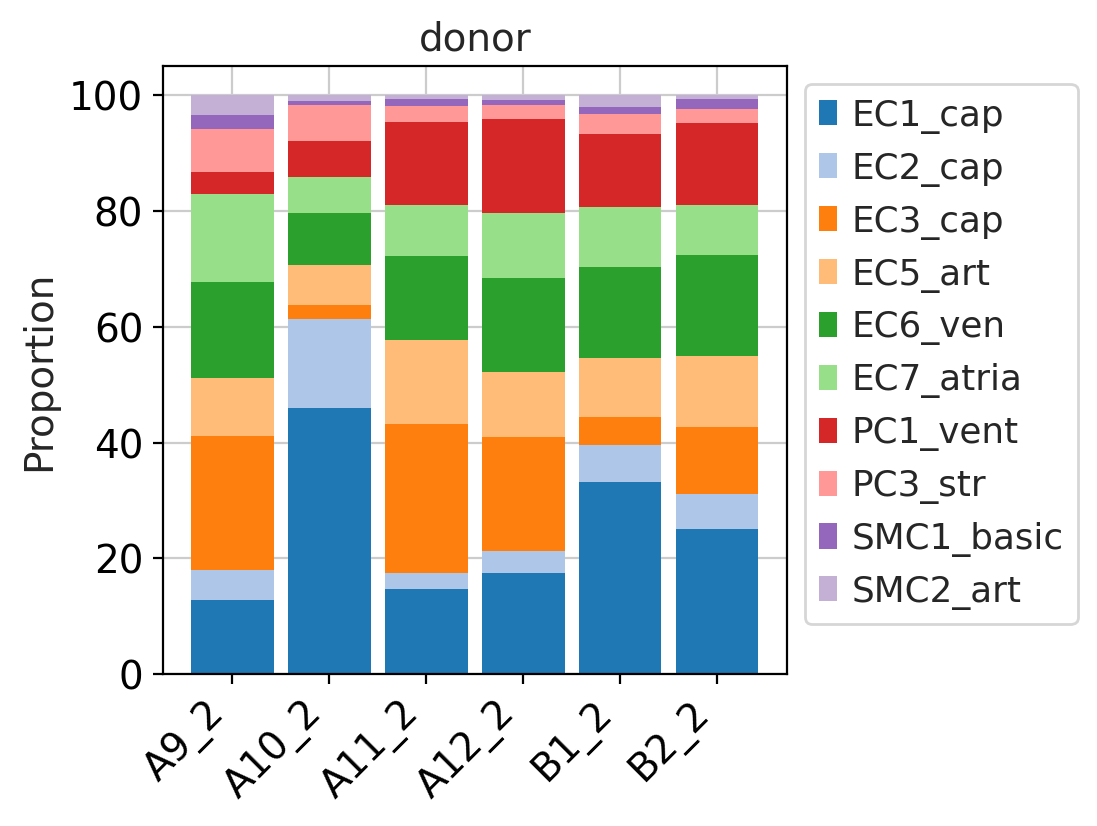

In [56]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')

In [57]:
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key= 'coda', formula= 'genotype')
sccoda_model.run_nuts(sccoda_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to SMC1_basic

sample: 100%|██████████| 11000/11000 [00:11<00:00, 994.28it/s, 63 steps of size 5.27e-02. acc. prob=0.52]  


Acceptance rate unusually low (0.521452346852361 < 0.5)! Results might be incorrect! Please check feasibility of 
results and re-run the sampling step with a different rng_key if necessary.

In [58]:
sccoda_model.set_fdr(sccoda_data, 0.05)

In [59]:
sccoda_data

MuData object with n_obs × n_vars = 22457 × 32295
  2 modalities
    rna:	22451 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	6 x 10
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.MdxSCID]', 'effect_df_genotype[T.WT]'

In [60]:
sccoda_data['coda'].varm['effect_df_genotype[T.MdxSCID]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
EC1_cap,0.0,-0.131,0.955,0.312,0.6823,762.357774,0.0
EC2_cap,0.0,-0.386,0.941,0.258,0.5041,210.274951,0.0
EC3_cap,0.0,-1.302,0.148,0.437,0.7153,583.716818,0.0
EC5_art,0.0,-0.549,0.533,0.184,0.4520,435.465670,0.0
EC6_ven,0.0,-0.377,0.644,0.194,0.4830,577.331119,0.0
EC7_atria,0.0,-0.532,0.534,0.180,0.4533,382.380415,0.0
PC1_vent,0.0,-0.432,0.631,0.187,0.4275,500.404096,0.0
PC3_str,0.0,-0.655,0.614,0.218,0.4547,151.020557,0.0
SMC1_basic,0.0,0.000,0.000,0.000,0.0000,71.766369,0.0


In [61]:
sccoda_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
EC1_cap,0.0,-0.877,0.516,0.241,0.4177,762.357774,0.0
EC2_cap,0.0,-0.444,0.966,0.286,0.4838,210.274951,0.0
EC3_cap,0.0,-1.960,0.184,0.651,0.7887,583.716818,0.0
EC5_art,0.0,-1.438,0.255,0.436,0.5960,435.465670,0.0
EC6_ven,0.0,-1.287,0.296,0.417,0.5761,577.331119,0.0
EC7_atria,0.0,-1.091,0.462,0.332,0.4940,382.380415,0.0
PC1_vent,0.0,-1.929,0.062,0.628,0.8458,500.404096,0.0
PC3_str,0.0,-0.455,1.116,0.315,0.4905,151.020557,0.0
SMC1_basic,0.0,0.000,0.000,0.000,0.0000,71.766369,0.0


In [62]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate            Cell Type 
genotype[T.MdxSCID]  EC1_cap       False
                     EC2_cap       False
                     EC3_cap       False
                     EC5_art       False
                     EC6_ven       False
                     EC7_atria     False
                     PC1_vent      False
                     PC3_str       False
                     SMC1_basic    False
                     SMC2_art      False
genotype[T.WT]       EC1_cap       False
                     EC2_cap       False
                     EC3_cap       False
                     EC5_art       False
                     EC6_ven       False
                     EC7_atria     False
                     PC1_vent      False
                     PC3_str       False
                     SMC1_basic    False
                     SMC2_art      False
Name: Final Parameter, dtype: bool

In [63]:
mdx_data = adata[adata.obs['genotype'].isin(['WT', 'Mdx'])].copy()
mdxscid_data = adata[adata.obs['genotype'].isin(['WT', 'MdxSCID'])].copy()

# ScCODA - Mdx

In [64]:
mdx_model = pt.tl.Sccoda()
sccoda_mdx_data = mdx_model.load(mdx_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdx_data

MuData object with n_obs × n_vars = 13964 × 32295
  2 modalities
    rna:	13960 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 10
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

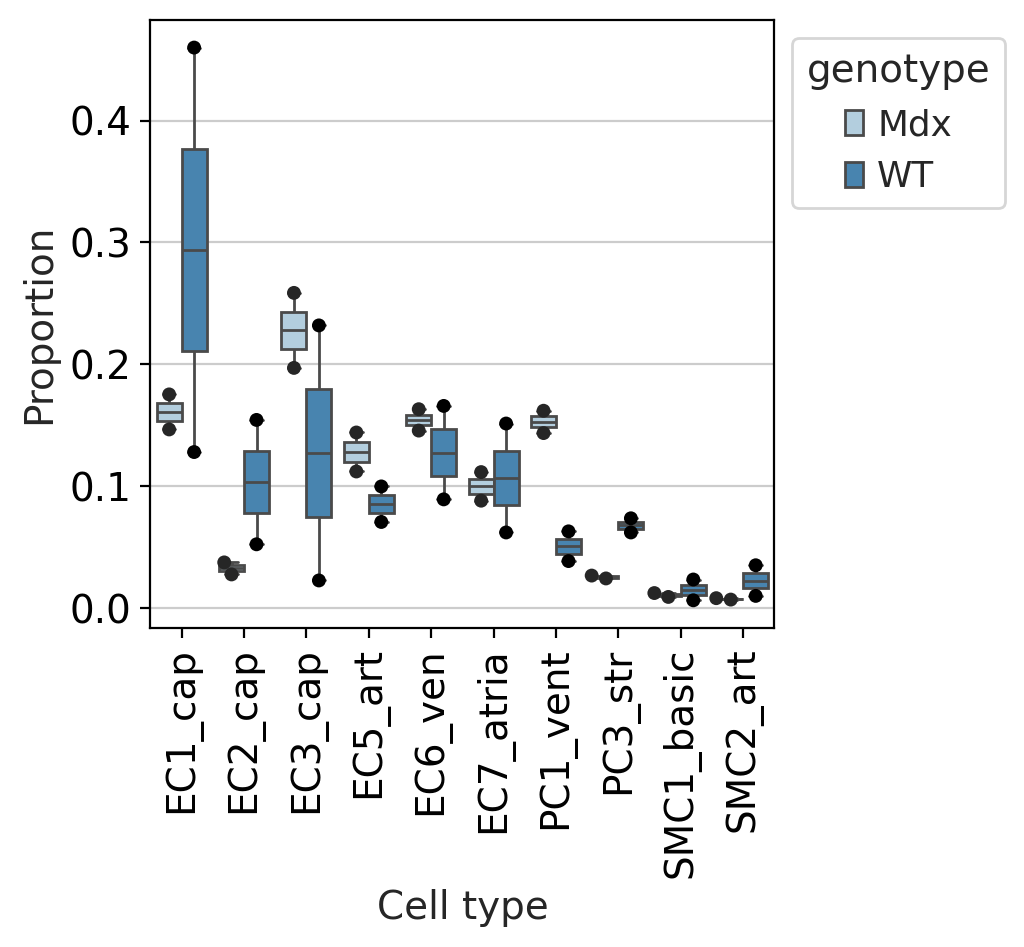

In [65]:
pt.pl.coda.boxplots(sccoda_mdx_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

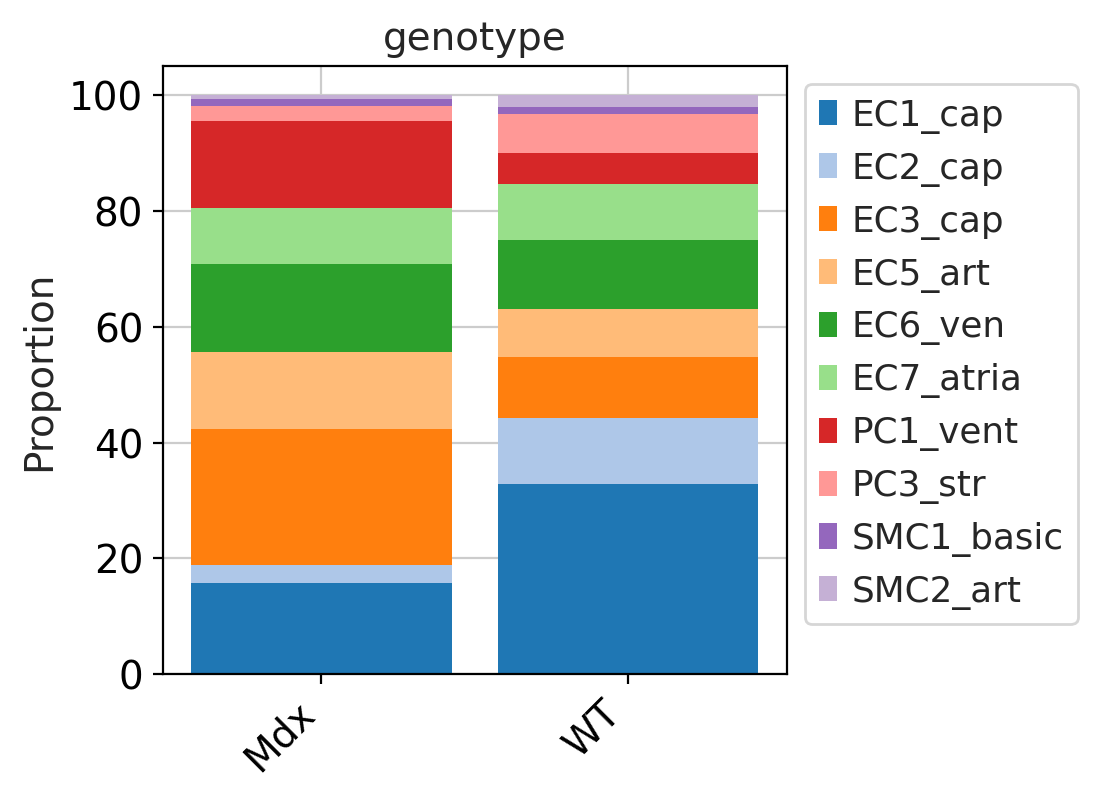

In [66]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

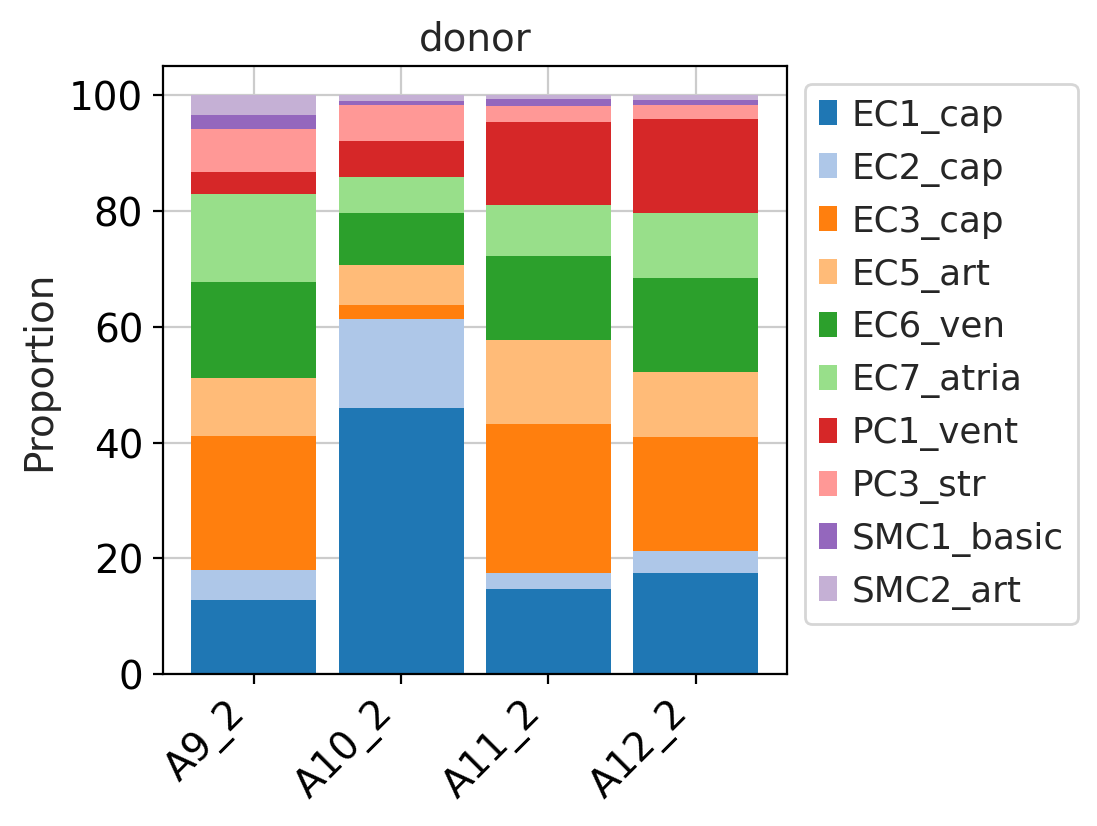

In [67]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='donor')

In [68]:
sccoda_mdx_data = mdx_model.prepare(sccoda_mdx_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdx_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to SMC1_basic

sample: 100%|██████████| 11000/11000 [00:11<00:00, 998.95it/s, 127 steps of size 2.68e-02. acc. prob=0.88] 


In [69]:
mdx_model.set_fdr(sccoda_mdx_data, 0.05)

In [70]:
sccoda_mdx_data

MuData object with n_obs × n_vars = 13964 × 32295
  2 modalities
    rna:	13960 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 10
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [71]:
sccoda_mdx_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
EC1_cap,0.0,-0.543,0.896,0.256,0.4545,648.601884,0.0
EC2_cap,0.0,-0.471,1.274,0.376,0.5230,188.635975,0.0
EC3_cap,0.0,-1.895,0.124,0.634,0.8134,665.021318,0.0
EC5_art,0.0,-1.348,0.401,0.420,0.5457,403.759377,0.0
EC6_ven,0.0,-1.285,0.430,0.376,0.5198,509.188915,0.0
EC7_atria,0.0,-1.017,0.658,0.310,0.4609,353.123939,0.0
PC1_vent,0.0,-1.944,0.166,0.634,0.7383,428.726462,0.0
PC3_str,0.0,-0.597,1.192,0.350,0.4801,155.526961,0.0
SMC1_basic,0.0,0.000,0.000,0.000,0.0000,69.325936,0.0


In [72]:
mdx_model.credible_effects(sccoda_mdx_data, modality_key="coda")

Covariate       Cell Type 
genotype[T.WT]  EC1_cap       False
                EC2_cap       False
                EC3_cap       False
                EC5_art       False
                EC6_ven       False
                EC7_atria     False
                PC1_vent      False
                PC3_str       False
                SMC1_basic    False
                SMC2_art      False
Name: Final Parameter, dtype: bool

# ScCODA - MdxSCID

In [73]:
mdxscid_model = pt.tl.Sccoda()
sccoda_mdxscid_data = mdxscid_model.load(mdxscid_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 12157 × 32295
  2 modalities
    rna:	12153 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 10
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

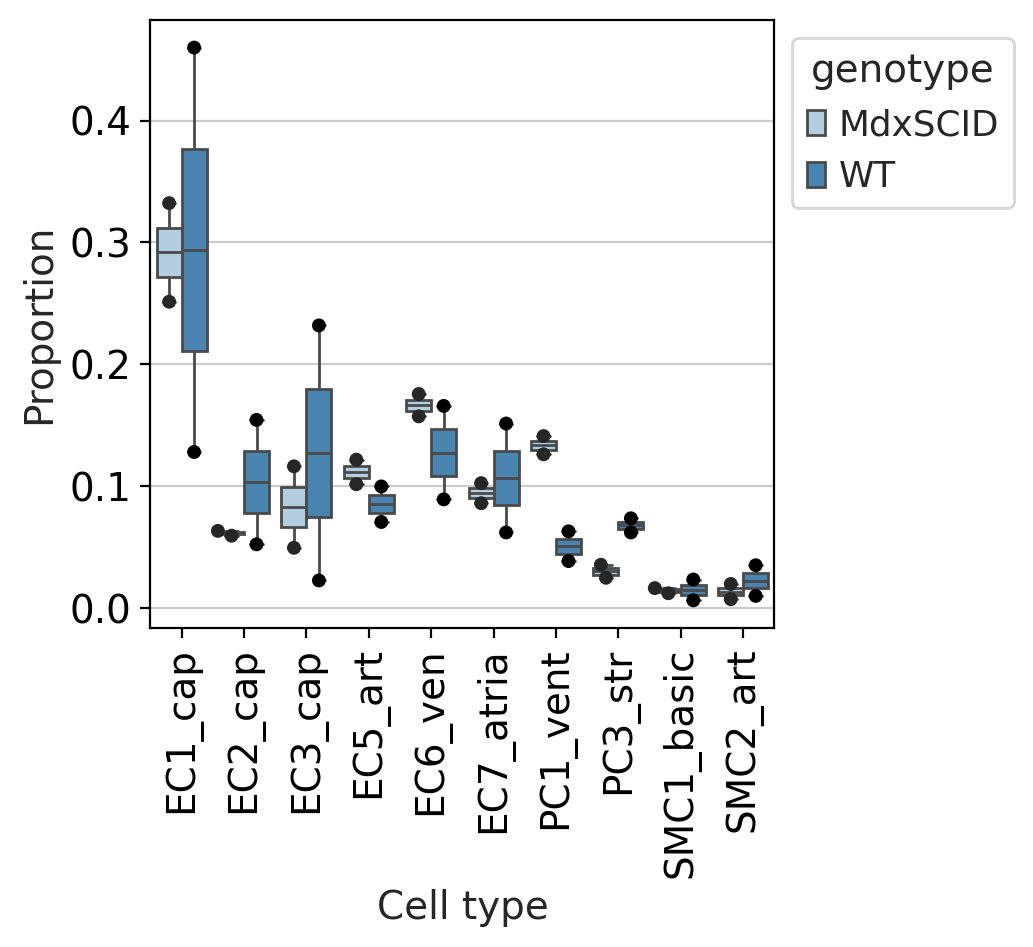

In [74]:
pt.pl.coda.boxplots(sccoda_mdxscid_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

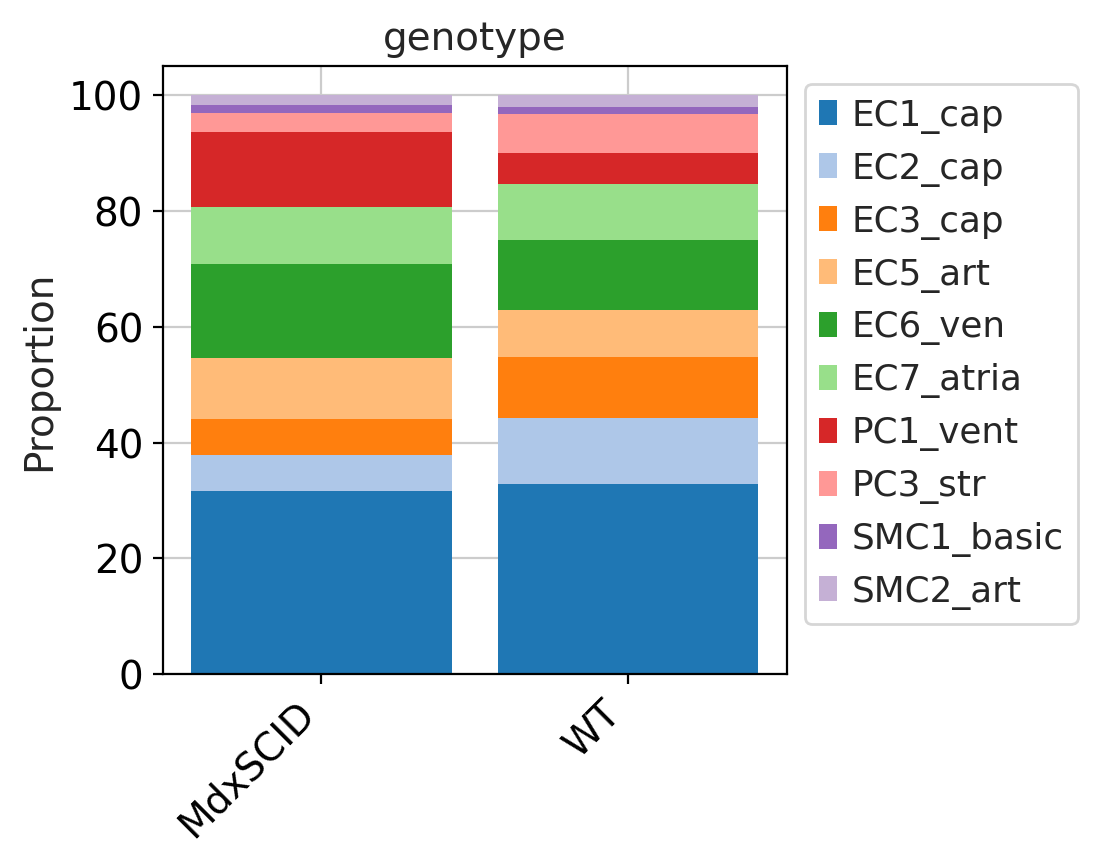

In [75]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

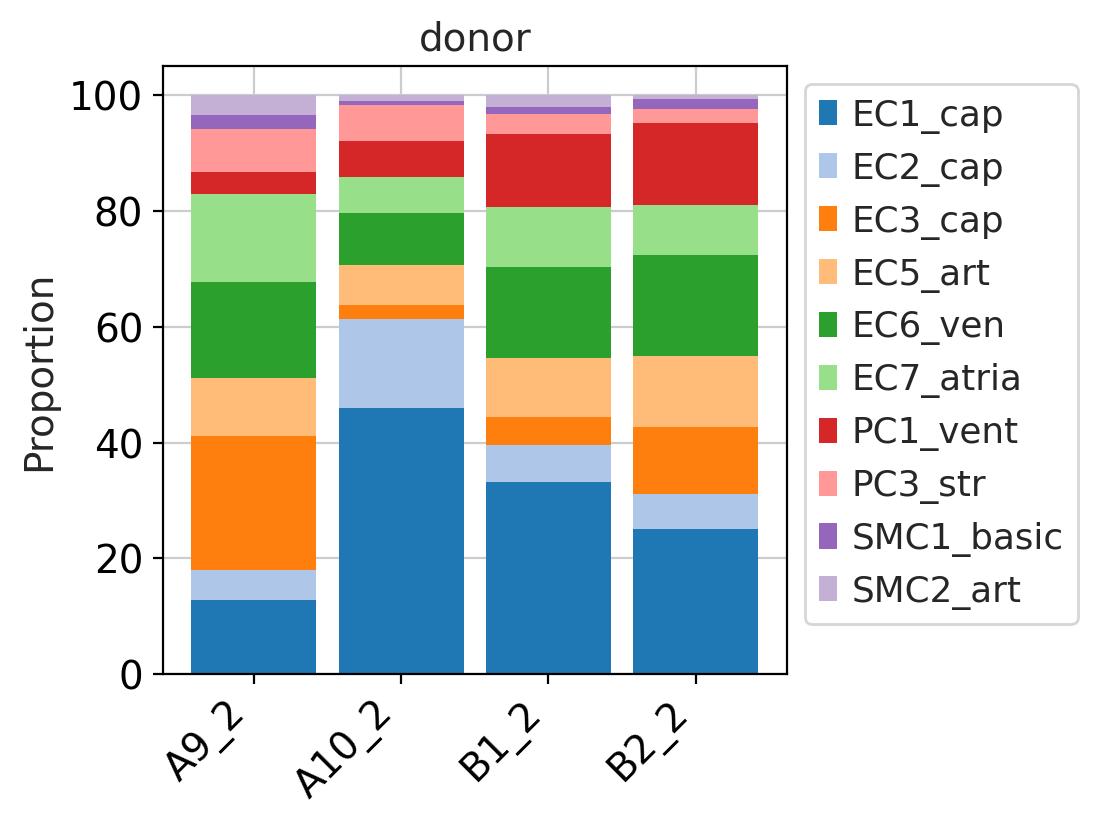

In [76]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='donor')

In [77]:
sccoda_mdxscid_data = mdx_model.prepare(sccoda_mdxscid_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdxscid_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to SMC1_basic

sample: 100%|██████████| 11000/11000 [00:07<00:00, 1554.74it/s, 63 steps of size 6.77e-02. acc. prob=0.76]


In [78]:
mdx_model.set_fdr(sccoda_mdxscid_data, 0.05)

In [79]:
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 12157 × 32295
  2 modalities
    rna:	12153 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 10
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [80]:
sccoda_mdxscid_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
EC1_cap,0.0,-0.644,0.351,0.189,0.4811,847.821148,0.0
EC2_cap,0.0,-0.474,0.699,0.214,0.4897,244.122391,0.0
EC3_cap,0.0,-0.626,0.538,0.207,0.4877,248.805061,0.0
EC5_art,0.0,-0.768,0.431,0.224,0.5004,323.005614,0.0
EC6_ven,0.0,-0.754,0.370,0.222,0.5018,468.094268,0.0
EC7_atria,0.0,-0.566,0.543,0.196,0.4848,311.272802,0.0
PC1_vent,0.0,-1.183,0.290,0.365,0.6061,300.566703,0.0
PC3_str,0.0,-0.444,0.897,0.267,0.5077,155.037916,0.0
SMC1_basic,0.0,0.000,0.000,0.000,0.0000,67.739516,0.0


In [81]:
mdx_model.credible_effects(sccoda_mdxscid_data, modality_key="coda")

Covariate       Cell Type 
genotype[T.WT]  EC1_cap       False
                EC2_cap       False
                EC3_cap       False
                EC5_art       False
                EC6_ven       False
                EC7_atria     False
                PC1_vent      False
                PC3_str       False
                SMC1_basic    False
                SMC2_art      False
Name: Final Parameter, dtype: bool